<a href="https://colab.research.google.com/gist/DolicaAkelloEgwel/c2a81dead051c310dfcd3cde5c288672/python-for-beginners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python for Beginners

## Jupyter Notebooks

Jupyter notebooks kinda encourage bad habits but we're using this today because it saves time and makes things simple.

## Part 1: Getting To Know Python
### Variables

In [30]:
message = "Hello, World!"

# Jupyter will print a single variable when its name has been typed out at the end of the cell
message

'Hello, World!'

### Data Types

In [31]:
num = 10
pi = 3.14
name = "John"
is_true = True
my_list = [1, 2, 3]

# A print statement allows me to see what's in a variable
print(pi)
# The comma allows me to print multiple items on one line
print(num, pi, name, is_true, my_list) 

num # This will not be printed
is_true # This will be printed

3.14
10 3.14 John True [1, 2, 3]


True

### Operations

In [32]:
x = 5
y = 3
summed = x + y
print(summed)

is_greater = x > y
is_equal = x == y

8


### Make the Computer Greet You




In [33]:
# Ask the user for their name
name = input("What is your name? ")

# Greet the user using their name
print("Hello, " + name + "! Nice to meet you.")

What is your name? Dolica
Hello, Dolica! Nice to meet you.


### Functions

In [34]:
# Step 1: Ask the user to enter their name and occupation
name = input("Enter your name: ")
occupation = input("Enter your occupation: ")

# Step 2: Define the generate_signature function
def generate_signature(name, occupation):
    signature = "Best regards,\n" + name + "\n" + occupation
    return signature

# Step 3: Call the generate_signature function with the user's input
email_signature = generate_signature(name, occupation)

# Step 4: Display the email signature to the user
print("Your email signature:\n")
print(email_signature)

Enter your name: Dolica
Enter your occupation: Creative Data Specialist Technician
Your email signature:

Best regards,
Dolica
Creative Data Specialist Technician


### Built-In Functions

In [35]:
numbers = [1,2,3]
# The type method shows us the type of a variable
print(type(sum))
sum(numbers)

<class 'builtin_function_or_method'>


6

#### Naming Variables

In [36]:
_proper_sum = sum
# This is something you shouldn't do
sum = 3 + 4 
print(sum)

7


In [37]:
sum([1,2,3])

TypeError: ignored

In [38]:
# Fixing it
sum = _proper_sum
sum([1,2,3])

6

## Part 2: Making an Image Scraper

In [39]:
import requests
from bs4 import BeautifulSoup
import os
import shutil

In [40]:
def photo_downloader(theme):
  # Create a url for unsplash based on our theme
  url = "https://unsplash.com/s/photos/" + theme

  # Create a request for the URL
  request = requests.get(url, allow_redirects=True)

  # Send the request text to BeautifulSoup
  data = BeautifulSoup(request.text, "html.parser")

  # Get a list of the images found at that URL
  all_found_images = data.find_all("figure", itemprop="image")

  # Get rid of the "pictures" folder if it already exists
  if os.path.exists("pictures"):
    shutil.rmtree("pictures") 
  
  # Create a new "pictures" folder and move to it
  os.makedirs("pictures")
  os.chdir("pictures")

  # Set a counter to zero
  count = 0

  # Loop through each of the images
  for image in all_found_images:

    # Get the image url object
    url = image.find("a", rel="nofollow")

    # Check that a URL was found, if not then we can't go any further
    if url is not None:
      # Get the URL as text
      image_url = url["href"]
      # Use the Requests library to get the photo data now that we have its URL
      photo_bytes = requests.get(image_url, allow_redirects=True)
      # Create a name for the image so we can save it
      img_name = f"{theme}-{count:02d}.jpg" 

      # Use Python's built-in open method to create a file
      with open(img_name, "wb") as photo:
        # Write the data in our photo_bytes variable to the file
        photo.write(photo_bytes.content)
        # Increase the counter
        count += 1
        # Print to the console that an image has been saved successfully
        print("Saved image " + img_name)
  
  print("all done")

In [41]:
photo_downloader("magician")

Saved image magician-00.jpg
Saved image magician-01.jpg
Saved image magician-02.jpg
Saved image magician-03.jpg
Saved image magician-04.jpg
Saved image magician-05.jpg
Saved image magician-06.jpg
Saved image magician-07.jpg
Saved image magician-08.jpg
Saved image magician-09.jpg
Saved image magician-10.jpg
Saved image magician-11.jpg
Saved image magician-12.jpg
Saved image magician-13.jpg
Saved image magician-14.jpg
Saved image magician-15.jpg
all done


In [42]:
import glob
# Ask Python to list all the images we have just downloaded
saved_image_list = glob.glob("*.jpg")
print(saved_image_list)

['magician-14.jpg', 'magician-06.jpg', 'magician-02.jpg', 'magician-01.jpg', 'magician-00.jpg', 'magician-11.jpg', 'magician-13.jpg', 'magician-09.jpg', 'magician-10.jpg', 'magician-12.jpg', 'magician-08.jpg', 'magician-07.jpg', 'magician-03.jpg', 'magician-05.jpg', 'magician-15.jpg', 'magician-04.jpg']


### Displaying a Random Image

In [43]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

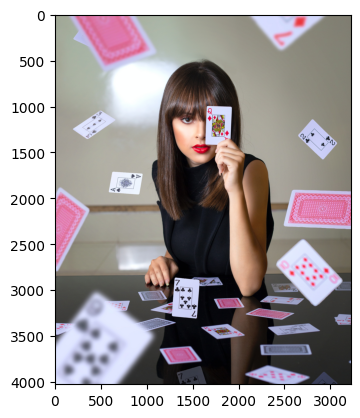

In [44]:
random_image_name = random.choice(saved_image_list)
random_image = mpimg.imread(random_image_name)
imgplot = plt.imshow(random_image)
plt.show()

### Using the Image to Create Glitch Art

A library called `glitchart` will be used to glitch the image. This is installed using the `pip` command. In Jupyter we can do this by placing an exclamation mark before the instruction. Once `glitchart` has been installed then we can import it and use it like what was done with the other libraries.

In [45]:
!pip3 install glitch-this
from glitch_this import ImageGlitcher
from PIL import Image
glitcher = ImageGlitcher()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Now the glitchart library can be used. It needs an argument for an image path as well as a `max_amount` that decides the level of "glitchiness" in the image. For this example we'll use a value of 50.

The result is that we get a `glitched_image_path` that tells us where the glitched image has been saved on the disk. This can then be given to the `imread` method so that it knows where to look.

Once an Image object has been created, we can then use it to create an ImagePlot object. Finally, we call the `show()` method to cause it to appear.

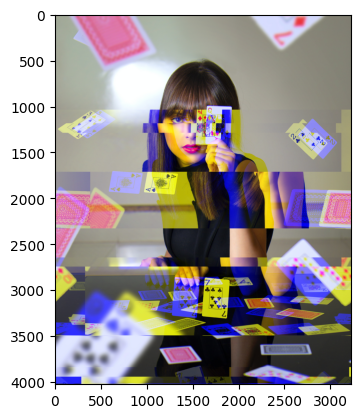

In [46]:
glitched_image = glitcher.glitch_image(Image.fromarray(random_image), 3.5, color_offset=True)
imgplot = plt.imshow(glitched_image)
plt.show()